In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf


In [2]:
gpus = tf.config.list_logical_devices('GPU') 
stg=tf.distribute.MirroredStrategy(gpus)

In [3]:
picture_size = 244
# folder_path = "../input/ckplus/CK+48/" 
# validation_folder_path = "../input/dataset2-modified-copy-2/dataset(2) - modified - Copy 2/images/"
# folder_path = "../input/dataset2-modified-copy-2/dataset(2) - modified - Copy 2/images/" 
# folder_path = "../input/dataset-1-modified/dataset(1) - modified/images/" 
folder_path = "/kaggle/input/emotionv3/facemo/images/" 
# folder_path = "../input/face-expression-recognition-dataset/images/"
# validation_folder_path = "../input/face-expression-recognition-dataset/images/"

In [4]:
from PIL import Image
import cv2
import os

folder_dir = '/kaggle/input/emotionv3/facemo/images/train'
SIZE = 244 # Crop the image to 48x48
DOWNSAMPLE_RATIO = 4 # Downsample the image by a factor of 4

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            image_path = os.path.join(folder_dir, folder, file)
            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, (SIZE, SIZE))
            cv2.imwrite(image_path, img_resized)
        else:
            continue

In [5]:
##expression = 'happy'
##plt.style.use('dark_background')
##plt.figure(figsize= (12,12))
##for i in range(1, 10, 1):
##    plt.subplot(3,3,i)
#     img = load_img(folder_path+"train/"+expression+"/"+
  ##  img = load_img(folder_path+"train/"+expression+"/"+
    ##              os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
##    plt.imshow(img)   
##plt.show()

In [6]:
batch_size  = 32

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

Found 3003 images belonging to 5 classes.
Found 1276 images belonging to 5 classes.


In [7]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import BatchNormalization

image_size = 244
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [9]:

from tensorflow.keras.optimizers import Adam,SGD,RMSprop

with stg.scope():
    input_shape = (244, 244, 3)
    num_classes = 5

    # Define the InceptionV3 model with pre-trained weights
    model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the layers in the base model
    for layer in model.layers:
        layer.trainable = False

    # Add a new output layer for the number of classes
    x = model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = tf.keras.models.Model(inputs=model.input, outputs=x)

    # Compile the model with a learning rate and loss function
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


87924736/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 244, 244, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 121, 121, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 121, 121, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 121, 121, 32) 0           batch_normalization[0][0]        
_____________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
model.fit(train_set,
          steps_per_epoch=len(train_set),
          epochs=7,
          validation_data=test_set,
          validation_steps=len(test_set))

Epoch 1/7
94/94 [==============================] - 380s 4s/step - loss: 0.9633 - accuracy: 0.7759 - val_loss: 1.7869 - val_accuracy: 0.6897
Epoch 2/7
94/94 [==============================] - 373s 4s/step - loss: 0.5931 - accuracy: 0.8608 - val_loss: 0.1900 - val_accuracy: 0.9420
Epoch 3/7
94/94 [==============================] - 414s 4s/step - loss: 0.2411 - accuracy: 0.9247 - val_loss: 0.2474 - val_accuracy: 0.9412
Epoch 4/7
94/94 [==============================] - 389s 4s/step - loss: 0.1069 - accuracy: 0.9637 - val_loss: 0.0738 - val_accuracy: 0.9718
Epoch 5/7
94/94 [==============================] - 387s 4s/step - loss: 0.1843 - accuracy: 0.9451 - val_loss: 0.1391 - val_accuracy: 0.9436
Epoch 6/7
94/94 [==============================] - 385s 4s/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 7/7
94/94 [==============================] - 386s 4s/step - loss: 0.0985 - accuracy: 0.9674 - val_loss: 0.0606 - val_accuracy: 0.9781


In [15]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

40/40 [==============================] - 112s 3s/step - loss: 0.0606 - accuracy: 0.9781
Test accuracy: 0.9780564308166504


In [16]:
model.save('/kaggle/working/my_model_emo.h5')

0 = Angry
1 = Happy
2 = Neutral
3 = Sad
4 = Surprise


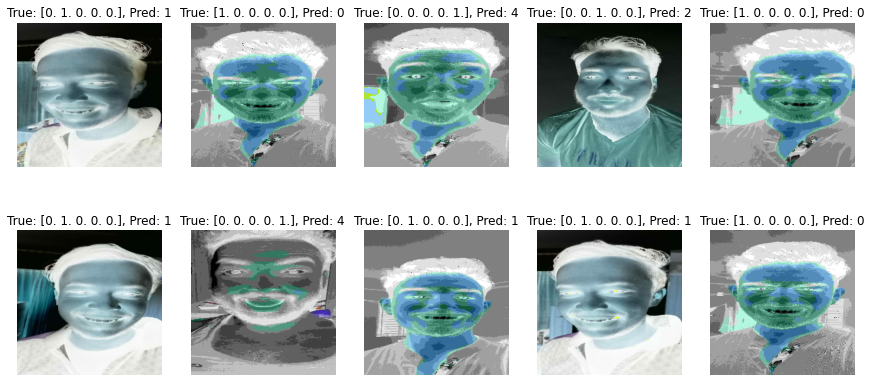

In [17]:
import numpy as np
import matplotlib.pyplot as plt
e = ['Angry','Happy','Neutral','Sad','Surprise']
for i in range(len(e)):
    print(i,"=",e[i])
# Get a batch of 10 random images from the test set
test_batch = test_set.next()
images = test_batch[0][:10]
true_labels = test_batch[1][:10]

# Make predictions using the trained model
pred_probs = model.predict(images)
pred_labels = np.argmax(pred_probs, axis=1)

# Plot the images with their true and predicted labels
fig, axs = plt.subplots(2, 5, figsize=(15, 7))
axs = axs.flatten()

for i in range(len(images)):
    # Rescale the pixel values from [0, 1] to [0, 255] and convert to integers
    img = (images[i] * 255).astype(np.uint8)
    axs[i].imshow(img)
    axs[i].set_title(f'True: {true_labels[i]}, Pred: {pred_labels[i]}')
    axs[i].axis('off')

plt.show()